In [17]:
# pip install git+https://github.com/swiss-seismological-service/SeismoStats.git

# visit: https://github.com/swiss-seismological-service/SeismoStats/blob/main/notebooks/manual.ipynb

In [18]:
#%matplotlib widget
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
from seismostats.analysis.estimate_mc import mc_ks, mc_max_curvature
from seismostats.utils.binning import bin_to_precision
from seismostats import plot_cum_fmd, plot_fmd

In [20]:
# Load the cleaned earthquake data
file_path = '../data/mainshocks_Reasenberg.csv'
df = pd.read_csv(file_path)

In [21]:
mc = mc_max_curvature(df['magnitude'], delta_m=0.1)

print(f'Maximum curvature method: Mc = {mc:.1f}')

Maximum curvature method: Mc = 3.8


In [22]:
# if Mc is known to be larger than or equal to 3.0

mc_kstest, beta_kstest, mcs_tested, betas, ks_ds, ps = mc_ks(
    bin_to_precision(df['magnitude'], 0.1),
    mcs_test=bin_to_precision(np.arange(3.0, 5.0, 0.1), 0.1),
    delta_m=0.1,
    p_pass=0.1,
) 

print("Tested Mc values:", mcs_tested)
print("First Mc to pass the KS test:", mc_kstest)
print(f"Associated beta value: {beta_kstest:.2f}")

Tested Mc values: [3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6]
First Mc to pass the KS test: 4.6
Associated beta value: 2.07


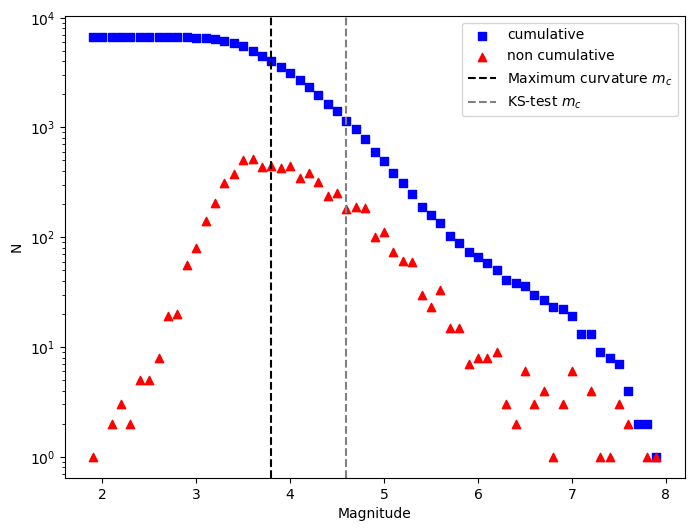

In [24]:
ax = plt.subplots(figsize=(8, 6))[1]

plot_cum_fmd(df['magnitude'], delta_m=0.1, ax=ax, color='blue')
plot_fmd(df['magnitude'], ax=ax, color='red')

plt.axvline(mc, color='black', linestyle='--', label='Maximum curvature $m_c$')
plt.axvline(mc_kstest, color='grey', linestyle='--', label='KS-test $m_c$')

plt.legend()
plt.show()